In [1]:
import os
import warnings
from pathlib import Path

import seaborn as sns

from configs.config import EDA
from utils import visualize

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [2]:
config_file = f"{os.getcwd()}/configs/eda.yml"
config = EDA.from_yaml_file(file=config_file)

data_path = Path(config.data_path)
train_path = data_path / "train"
val_path = data_path / "val"
test_path = data_path / "test"

class_count = config.class_count

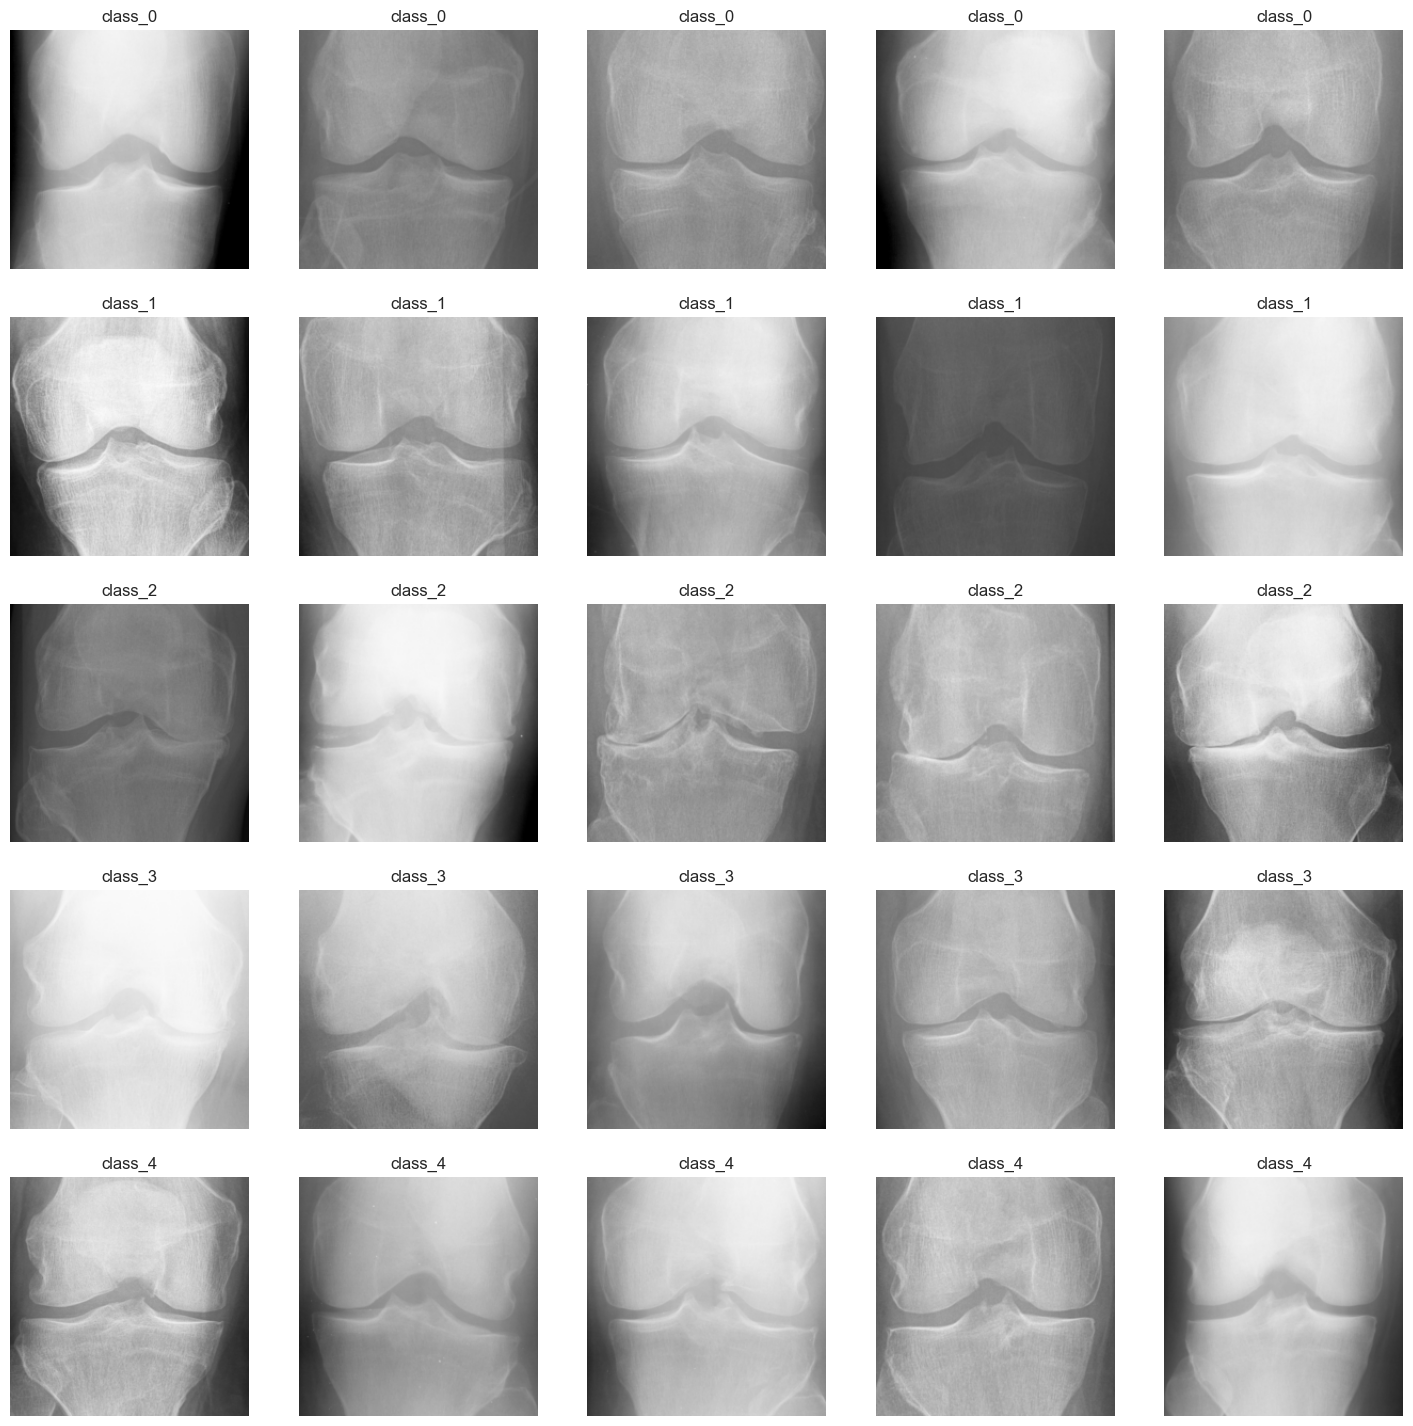

In [3]:
visualize.show_samples(train_path)

In [4]:
# Initialize number_of_classes for the new class indices
number_of_classes = [0] * (max(config.label_map.keys()) + 1)

# Get the list of class directories from train_path
classes = sorted([d.name for d in train_path.iterdir() if d.is_dir()])

# Iterate over each class directory
for class_id in classes:
    class_index = int(class_id)

    number_of_classes[class_index] += len(list((train_path / class_id).glob("*")))
    number_of_classes[class_index] += len(list((val_path / class_id).glob("*")))
    number_of_classes[class_index] += len(list((test_path / class_id).glob("*")))

Total number of observations: 8262


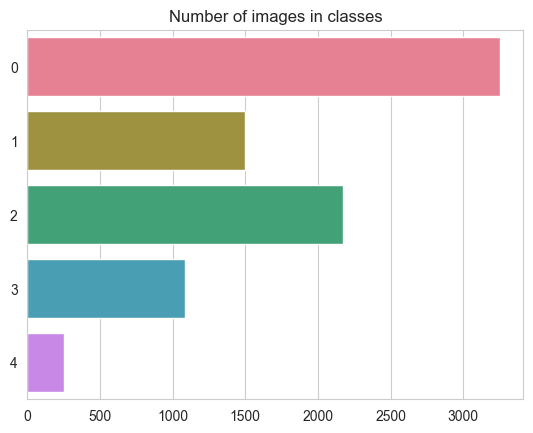

In [5]:
sns.barplot(x=number_of_classes, y=classes, palette="husl").set(
    title="Number of images in classes"
)
print(f"Total number of observations: {sum(number_of_classes)}")

Total number of images in train set: 5780
Class distribution in train set: [2286, 1048, 1516, 757, 173]
Total number of images in val set: 826
Class distribution in val set: [328, 153, 212, 106, 27]
Total number of images in test set: 1656
Class distribution in test set: [639, 296, 447, 223, 51]


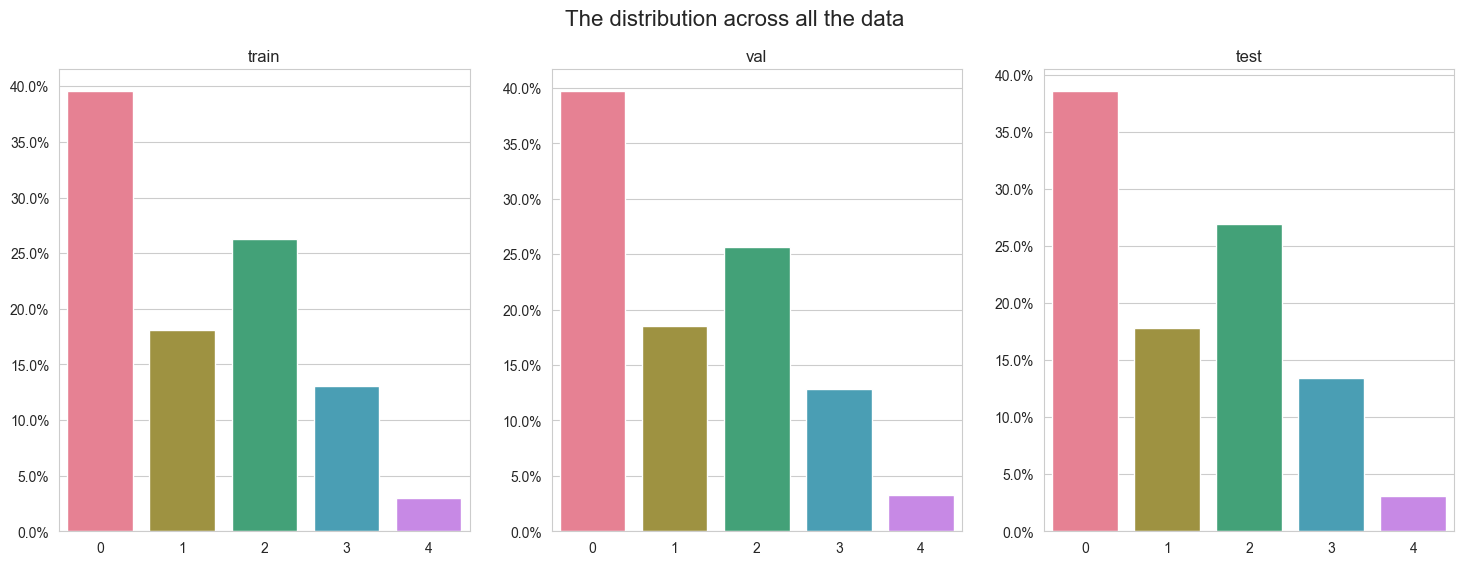

In [6]:
visualize.show_distributions(data_path)

In [7]:
# Initialize number_of_classes for the new class indices
number_of_classes = [0] * (max(config.label_map.values()) + 1)

# Get the list of class directories from train_path
classes = sorted([d.name for d in train_path.iterdir() if d.is_dir()])

# Iterate over each class directory
for class_id in classes:
    original_class_index = int(class_id)
    new_class_index = config.label_map.get(original_class_index, 0)

    number_of_classes[new_class_index] += len(list((train_path / class_id).glob("*")))
    number_of_classes[new_class_index] += len(list((val_path / class_id).glob("*")))
    number_of_classes[new_class_index] += len(list((test_path / class_id).glob("*")))

Total number of observations: 8262


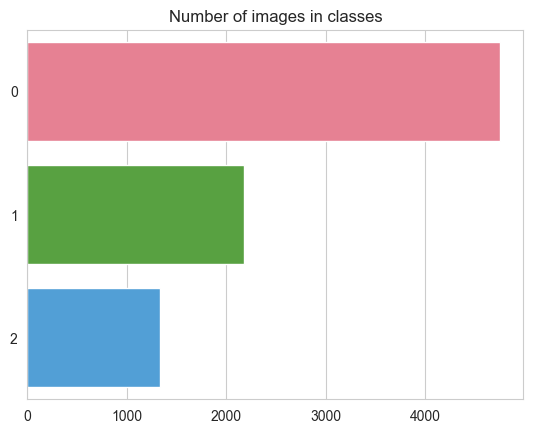

In [8]:
sns.barplot(x=number_of_classes, y=classes[:-2], palette="husl").set(
    title="Number of images in classes"
)
print(f"Total number of observations: {sum(number_of_classes)}")

Total number of images in train set: 5780
Class distribution in train set: [3334, 1516, 930]
Total number of images in val set: 826
Class distribution in val set: [481, 212, 133]
Total number of images in test set: 1656
Class distribution in test set: [935, 447, 274]


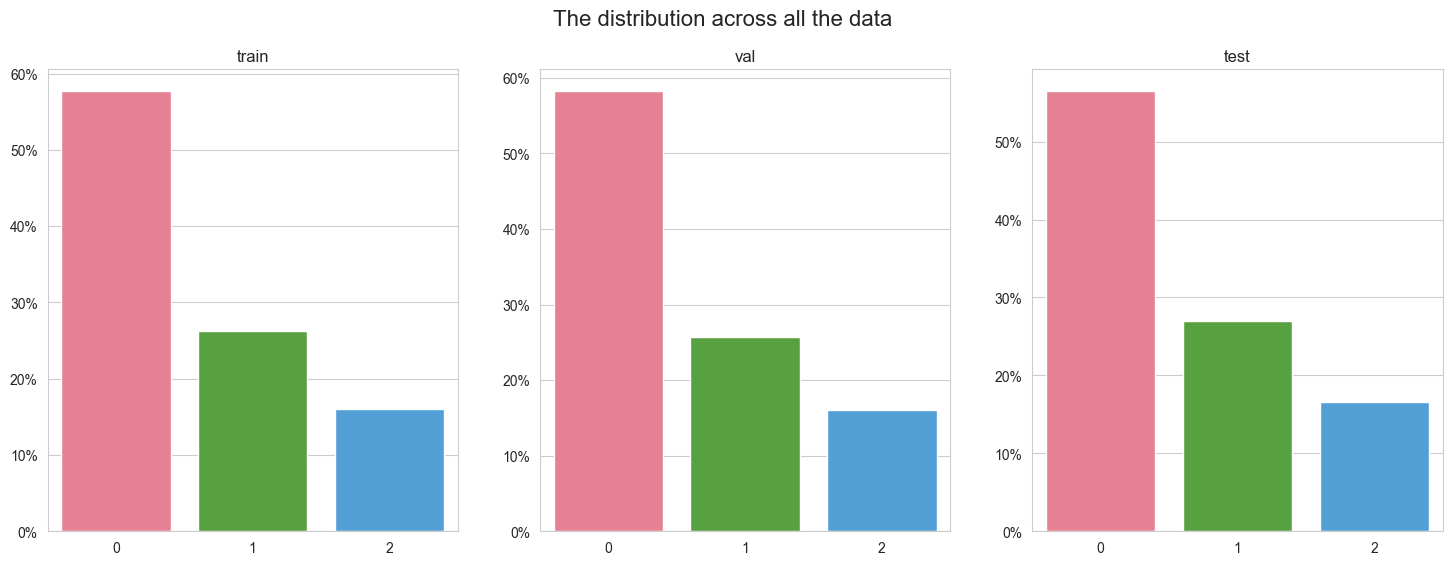

: 

In [9]:
visualize.show_distributions(data_path, label_map=config.label_map)